# 0. About

This notebook is to explore the `fit()` and `transform()` methods of the transformer from the data preprocessing.
One of the refs can be found here:
https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

import os
import time

# 1. Loading Data

In [5]:
# find where the data is stored
repo_path = os.path.dirname(os.getcwd())
data_path = repo_path + '\\data\\GP_regression\\' # borrowed from GP regression

In [9]:
# import data
one_feature_data_arr = np.genfromtxt(data_path+"generated_one_feature_data.csv", delimiter=',')
one_feature_data = {
    "data_num": one_feature_data_arr.shape[0], 
    "x_train": one_feature_data_arr[:, 0].reshape(-1, 1), 
    "y_train": one_feature_data_arr[:, 1].reshape(-1, 1), 
    "std_y_train": one_feature_data_arr[:, 2].flatten()
}

del one_feature_data_arr

# 2. Fit and Transform

Instantiating the standardization class first.

In [16]:
scaler = preprocessing.StandardScaler()
print(scaler.scale_)

AttributeError: 'StandardScaler' object has no attribute 'scale_'

As one may see, the object has no attribute of the `scale_`, i.e. standard deviation of the training data.

Now we can compute it, by providing dataset to the object.

In [18]:
scaler.fit(one_feature_data['x_train'])
print('std is:')
print(scaler.scale_)
print('mean is:')
print(scaler.mean_)

std is:
[1.51712447]
mean is:
[2.6]


After the `fit()` method, we can apply the `transform()` method, as we wish to standardize the dataset.

In [19]:
x_new = scaler.transform(one_feature_data['x_train'])

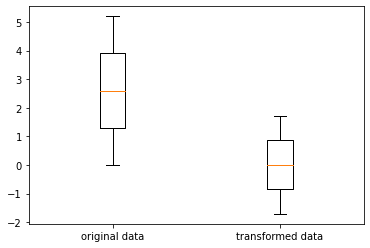

In [28]:
# visualization of both datasets
x_both = np.zeros((one_feature_data['data_num'], 2))
x_both[:, 0] = one_feature_data['x_train'].flatten()
x_both[:, 1] = x_new.flatten()

plt.boxplot(x_both)
plt.xticks([1, 2], ['original data', 'transformed data']);

Also, the method `fit_transform()` can do both operation

In [31]:
x_new_new = preprocessing.StandardScaler().fit_transform(one_feature_data['x_train'])
print('The difference between two new datasets is:')
print(np.linalg.norm(x_new_new-x_new))

The difference between two new datasets is:
0.0
